<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-4-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
print("The first 20 rows of the dataframe\n")
boston_df.tail(20)

The first 20 rows of the dataframe



,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
486,486,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,14.98,19.1
487,487,4.83567,0.0,18.10,0.0,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,11.45,20.6
488,488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,711.0,20.1,18.06,15.2
489,489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,23.97,7.0
490,490,0.20746,0.0,27.74,0.0,0.609,5.093,98.0,1.8226,4.0,711.0,20.1,29.68,8.1
491,491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,18.07,13.6
492,492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,13.35,20.1
493,493,0.17331,0.0,9.69,0.0,0.585,5.707,54.0,2.3817,6.0,391.0,19.2,12.01,21.8
494,494,0.27957,0.0,9.69,0.0,0.585,5.926,42.6,2.3817,6.0,391.0,19.2,13.59,24.5
495,495,0.17899,0.0,9.69,0.0,0.585,5.670,28.8,2.7986,6.0,391.0,19.2,17.60,23.1


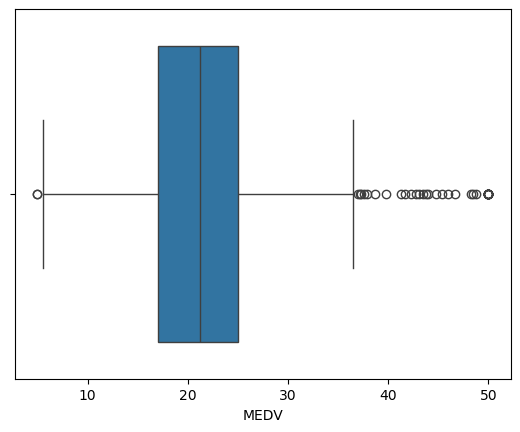

In [8]:
#For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(x="MEDV", data=boston_df)

In [9]:
#1. Is there a significant difference in median value of houses bounded by the Charles River?
#Hypotheses:
#𝐻0: There is no significant difference in the median value of houses bounded by the Charles River (CHAS = 1) versus those that are not (CHAS = 0).
#𝐻1: There is a significant difference in the median value of houses bounded by the Charles River (CHAS = 1) versus those that are not (CHAS = 0).
#Significance Level: α = 0.05

#PYTHON CODE:

from scipy.stats import ttest_ind

# Split the data into two groups based on whether they bound the Charles River or not
medv_charles = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_non_charles = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform the t-test
t_stat, p_value = ttest_ind(medv_charles, medv_non_charles, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Conclusion
if p_value < 0.05:
    conclusion = "Reject the null hypothesis: There is a significant difference in the median values of houses bounded by the Charles River."
else:
    conclusion = "Fail to reject the null hypothesis: There is no significant difference in the median values of houses bounded by the Charles River."

print(conclusion)


T-statistic: 3.113291312794837
P-value: 0.003567170098137517
Reject the null hypothesis: There is a significant difference in the median values of houses bounded by the Charles River.


In [10]:
import matplotlib.pyplot as plt

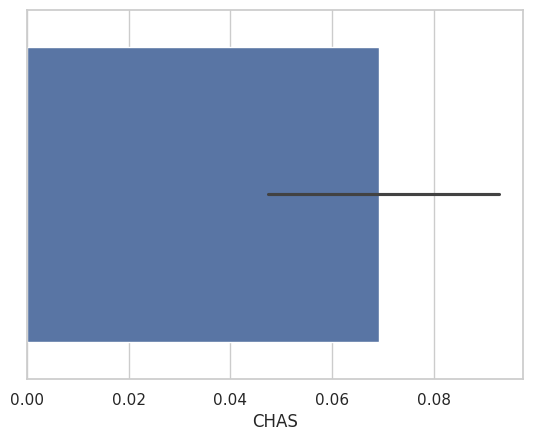

In [11]:
#Provide a  bar plot for the Charles river variable
sns.set(style="whitegrid")
ax = sns.barplot(x="CHAS", data=boston_df)
pyplot.show()

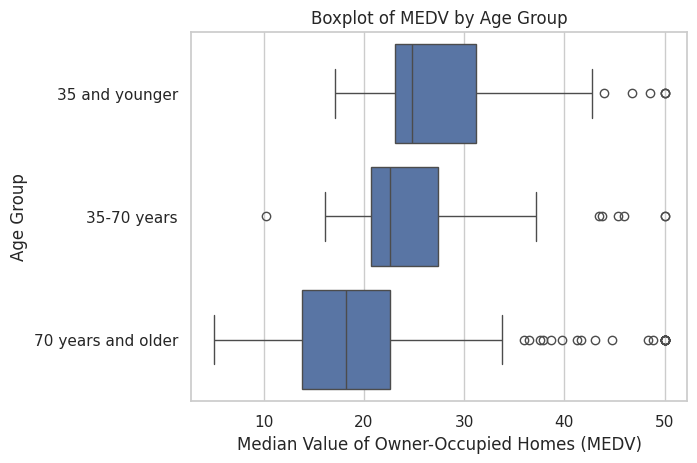

In [18]:
#Explanation of the Code
#pd.cut: This function is used to segment and sort data values into bins. Here, we're using it to categorize AGE into the three specified age groups.
#Labels: These labels are used to name each age category.
#Box Plot: The box plot will now show the distribution of MEDV values across these age groups.

# Discretize the AGE variable into three groups
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and younger', '35-70 years', '70 years and older'])

# Create the boxplot using the new AGE_Group variable
sns.set(style="whitegrid")
ax = sns.boxplot(x="MEDV", y="AGE_Group", data=boston_df)
plt.xlabel("Median Value of Owner-Occupied Homes (MEDV)")
plt.ylabel("Age Group")
plt.title("Boxplot of MEDV by Age Group")
plt.show()


In [15]:
#2. Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built before 1940 (AGE)?
#Test: ANOVA
#Hypotheses: 
#𝐻0: There is no significant difference in the median values of houses across different age groups.
#𝐻1: here is a significant difference in the median values of houses across different age groups.
# Significance Level: α = 0.05
from scipy.stats import f_oneway

# Categorize AGE into three groups: <= 35, 35-70, > 70 years
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and younger', '35-70 years', '70 years and older'])

# Perform ANOVA
medv_35_younger = boston_df[boston_df['AGE_Group'] == '35 and younger']['MEDV']
medv_35_70 = boston_df[boston_df['AGE_Group'] == '35-70 years']['MEDV']
medv_70_older = boston_df[boston_df['AGE_Group'] == '70 years and older']['MEDV']

f_stat, p_value = f_oneway(medv_35_younger, medv_35_70, medv_70_older)

print("F-statistic:", f_stat)
print("P-value:", p_value)

# Conclusion
if p_value < 0.05:
    conclusion = "Reject the null hypothesis: There is a significant difference in median values of houses for different age groups."
else:
    conclusion = "Fail to reject the null hypothesis: There is no significant difference in median values of houses for different age groups."

print(conclusion)




#4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?
#Test: Linear Regression
#Hypotheses: 
#𝐻0:There is no correlation between Nitric oxide concentration (NOX) and the proportion of non-retail business acres (INDUS).
#𝐻1: There is a correlation between Nitric oxide concentration (NOX) and the proportion of non-retail business acres (INDUS).
#Significance Level: α = 0.05
import statsmodels.api as sm

# Define the independent and dependent variables
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant to the independent variable for the regression intercept
X = sm.add_constant(X)

# Perform the linear regression
model = sm.OLS(y, X).fit()
print(model.summary())

# Extract p-value for the DIS coefficient
p_value_dis = model.pvalues['DIS']

# Conclusion
if p_value_dis < 0.05:
    conclusion = "Reject the null hypothesis: There is a significant impact of distance to employment centers on the median value of homes."
else:
    conclusion = "Fail to reject the null hypothesis: There is no significant impact of distance to employment centers on the median value of homes."

print(conclusion)


F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Reject the null hypothesis: There is a significant difference in median values of houses for different age groups.
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        09:31:57   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err

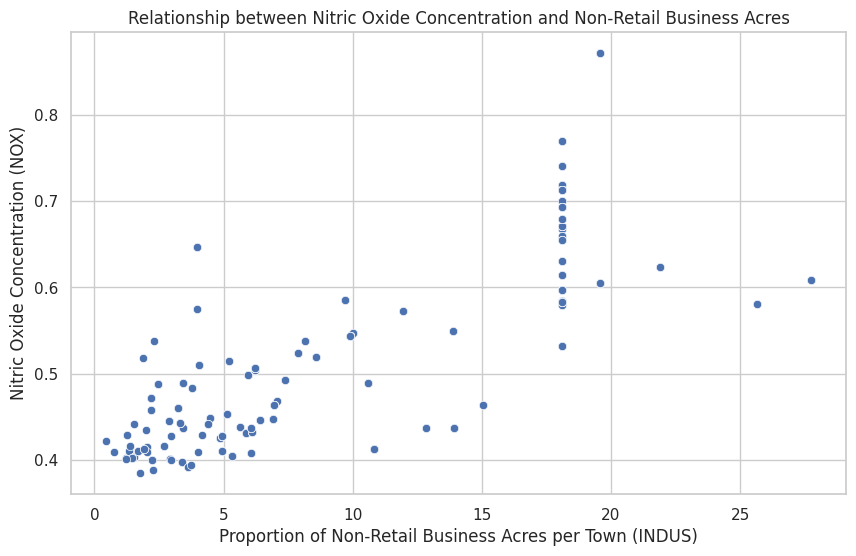

In [19]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x="INDUS", y="NOX", data=boston_df)

# Label the axes and add a title
plt.xlabel("Proportion of Non-Retail Business Acres per Town (INDUS)")
plt.ylabel("Nitric Oxide Concentration (NOX)")
plt.title("Relationship between Nitric Oxide Concentration and Non-Retail Business Acres")

# Display the plot
plt.show()

In [ ]:
#Explanation of the Plot
#Positive Correlation: There appears to be a general upward trend, especially in the lower INDUS values (0–10). This suggests that as the proportion of non-retail business acres increases, the concentration of Nitric oxide tends to increase as well.

#Clusters of Data: There’s a noticeable cluster around INDUS values of approximately 20, where NOX concentrations vary, suggesting some towns have high industrial proportions with variable levels of Nitric oxide concentrations.

#Potential Outliers: The points at higher INDUS values with lower NOX concentrations could indicate exceptions to the general trend, possibly due to factors not captured by these variables.
#To further quantify the relationship between NOX and INDUS, you could calculate the correlation coefficient. A strong positive correlation would indicate that industrial activity is likely contributing to higher Nitric oxide levels in these areas.

In [20]:
# Calculate the correlation between NOX and INDUS
correlation = boston_df['NOX'].corr(boston_df['INDUS'])
print("Correlation between NOX and INDUS:", correlation)


Correlation between NOX and INDUS: 0.763651446920914


In [13]:
#This will provide a numeric value to support the visual trend observed in the scatter plot. If the correlation is high (close to +1), it would confirm a strong positive relationship.

#3. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?
#Test: Pearson Correlation
#Hypotheses:
#𝐻0:There is no correlation between Nitric oxide concentration (NOX) and the proportion of non-retail business acres (INDUS).
#𝐻1: There is a correlation between Nitric oxide concentration (NOX) and the proportion of non-retail business acres (INDUS).
#Significance Level: α = 0.05

from scipy.stats import pearsonr

# Calculate Pearson correlation
corr_coeff, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Correlation coefficient:", corr_coeff)
print("P-value:", p_value)

# Conclusion
if p_value < 0.05:
    conclusion = "Reject the null hypothesis: There is a significant correlation between Nitric oxide concentration and the proportion of non-retail business acres."
else:
    conclusion = "Fail to reject the null hypothesis: There is no significant correlation between Nitric oxide concentration and the proportion of non-retail business acres."

print(conclusion)


Correlation coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
Reject the null hypothesis: There is a significant correlation between Nitric oxide concentration and the proportion of non-retail business acres.


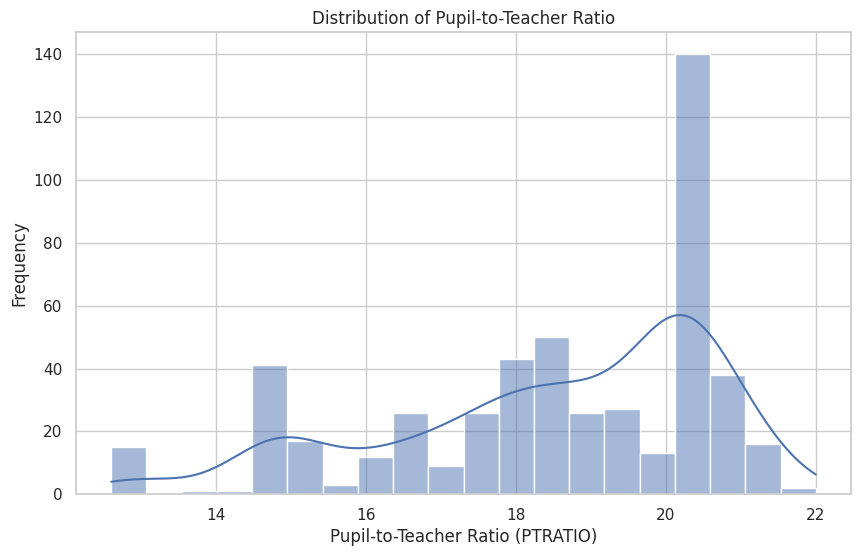

In [21]:
#Create a histogram for the pupil to teacher ratio variable

# Set the style for the plot
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)

# Label the axes and add a title
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Frequency")
plt.title("Distribution of Pupil-to-Teacher Ratio")

# Display the plot
plt.show()